**הסבר על הקוד:**

1. **ייבוא ספריית pandas:** `import pandas as pd` - ייבוא הספרייה pandas לעבודה עם נתונים בצורה של DataFrames.
2. **טעינת הנתונים:** `data = pd.read_csv(file_url)` - טעינת הנתונים מכתובת URL לתוך DataFrame בשם data.
3. **הצגת הנתונים:** `data.head()` - הצגת חמש השורות הראשונות של הנתונים כדי לקבל מושג על המבנה שלהם.


In [1]:
import pandas as pd

# Step 1: Load the dataset from the raw URL
file_url = 'https://raw.githubusercontent.com/raza783/advences-ml-project/main/import_costums.csv'
data = pd.read_csv(file_url)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
data.head()


First few rows of the dataset:


,Year,Month,Origin_Country,CustomsItem_2_Digits,CustomsItem_8_Digits,Exempt_CustomsItem,CustomsHouse,Quantity,Quantity_MeasurementUnitID,Quantity_MeasurementUnitName,...,NISCurrencyAmount,CurrencyCode,AutonomyTypeID,AutonomyType,GovernmentProcedureTypeName,GovernmentProcedureTypeEnglishName,IsPreferenceDocument,GeneralCustomsTax,PurchaseTax,VAT
0,2024,1,AE,87,87082990,-7.319000e+09,Jordan River,1.0,1,Each,...,9513.80,USD,NaN,Israel,יבוא אישי,HomeUseImport,0,0,2100,2056
1,2024,1,AE,87,87089990,NaN,Ben Gurion Airport,7.0,1,Each,...,444.78,USD,NaN,Israel,יבוא מסחרי,CommercialImport,1,0,97,103
2,2024,1,AE,90,90132000,NaN,Ben Gurion Airport,1.0,1,Each,...,6561.24,USD,NaN,Israel,יבוא מסחרי,CommercialImport,0,0,0,1127
3,2024,1,AE,90,90212190,NaN,Ben Gurion Airport,7.0,6,Kilogram,...,2870.12,AED,NaN,Israel,יבוא אישי-בלדרים,HomeUseImportCourier,0,0,0,495
4,2024,1,AE,90,90212990,NaN,Ben Gurion Airport,2.0,6,Kilogram,...,401.01,AED,NaN,Israel,יבוא מסחרי-בלדרים,CommercialImportCourier,0,0,0,72


**הסבר על הקוד:**

1. **יצירת 'vat_rank':** `data['vat_rank'] = pd.qcut(data['VAT'], q=5, labels=[1, 2, 3, 4, 5])` - יצירת עמודה חדשה בשם 'vat_rank' על ידי חלוקת ערכי עמודה 'VAT' ל-5 קבוצות שוות (quantiles) ומתן תוויות 1-5 לכל קבוצה.
2. **הצגת התפלגות 'vat_rank':** `print(data['vat_rank'].value_counts())` - הצגת מספר הערכים בכל קבוצה של 'vat_rank' כדי להבין את התפלגותה.


In [2]:
# Step 2: Analyze the VAT column and create 'vat_rank'
# Use pd.qcut to divide the VAT values into 5 quantiles
data['vat_rank'] = pd.qcut(data['VAT'], q=5, labels=[1, 2, 3, 4, 5])

# Display the distribution of the 'vat_rank' column
print(data['vat_rank'].value_counts())


vat_rank
1    6347
5    6338
2    6336
4    6336
3    6334
Name: count, dtype: int64


**הסבר על הקוד:**

1. **סינון עמודות עם ערכים חסרים:** הסרת עמודות עם יותר מ-50% ערכים חסרים.
2. **טיפול בערכים חסרים:** מילוי ערכים חסרים בעמודות נומריות עם החציון ובעמודות קטגוריות עם הערך השכיח ביותר.
3. **הצגת ספירת ערכים חסרים:** הצגת מספר הערכים החסרים בכל עמודה לאחר המילוי.

In [3]:
# Step 3: Handle missing values
# Filter out columns with more than 50% missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
columns_to_keep = missing_percentage[missing_percentage <= 50].index
data_filtered = data[columns_to_keep]

# Handle missing values for remaining columns
# Fill numerical columns with the median value
numerical_columns = data_filtered.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median_value = data_filtered[col].median()
    data_filtered[col].fillna(median_value, inplace=True)

# Fill categorical columns with the most frequent value (mode)
categorical_columns = data_filtered.select_dtypes(include=['object']).columns
for col in categorical_columns:
    most_frequent = data_filtered[col].mode()[0]
    data_filtered[col].fillna(most_frequent, inplace=True)

# Display the count of missing data after filling
print(data_filtered.isnull().sum())


<ipython-input-3-67960be7fc1a>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filtered[col].fillna(median_value, inplace=True)
<ipython-input-3-67960be7fc1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[col].fillna(median_value, inplace=True)
<ipython-input-3-67960be7fc1a>:19: FutureWarning: A value is trying to be s

Year                                  0
Month                                 0
Origin_Country                        0
CustomsItem_2_Digits                  0
CustomsItem_8_Digits                  0
CustomsHouse                          0
Quantity                              0
Quantity_MeasurementUnitID            0
Quantity_MeasurementUnitName          0
TermsOfSale                           0
IsTradeAgreementWithQuota             0
NISCurrencyAmount                     0
CurrencyCode                          0
AutonomyType                          0
GovernmentProcedureTypeName           0
GovernmentProcedureTypeEnglishName    0
IsPreferenceDocument                  0
GeneralCustomsTax                     0
PurchaseTax                           0
VAT                                   0
vat_rank                              0
dtype: int64


**הסבר על הקוד:**

1. **ייבוא ספריות:** ייבוא seaborn ו-matplotlib לצורך ויזואליזציה.
2. **בחירת עמודות נומריות:** בחירת עמודות נומריות בלבד לחישוב מתאם.
3. **חישוב מטריצת מתאם:** חישוב מתאם בין כל זוג עמודות נומריות.
4. **הצגת מטריצת מתאם:** הצגת מטריצת המתאם באמצעות מפת חום (heatmap).

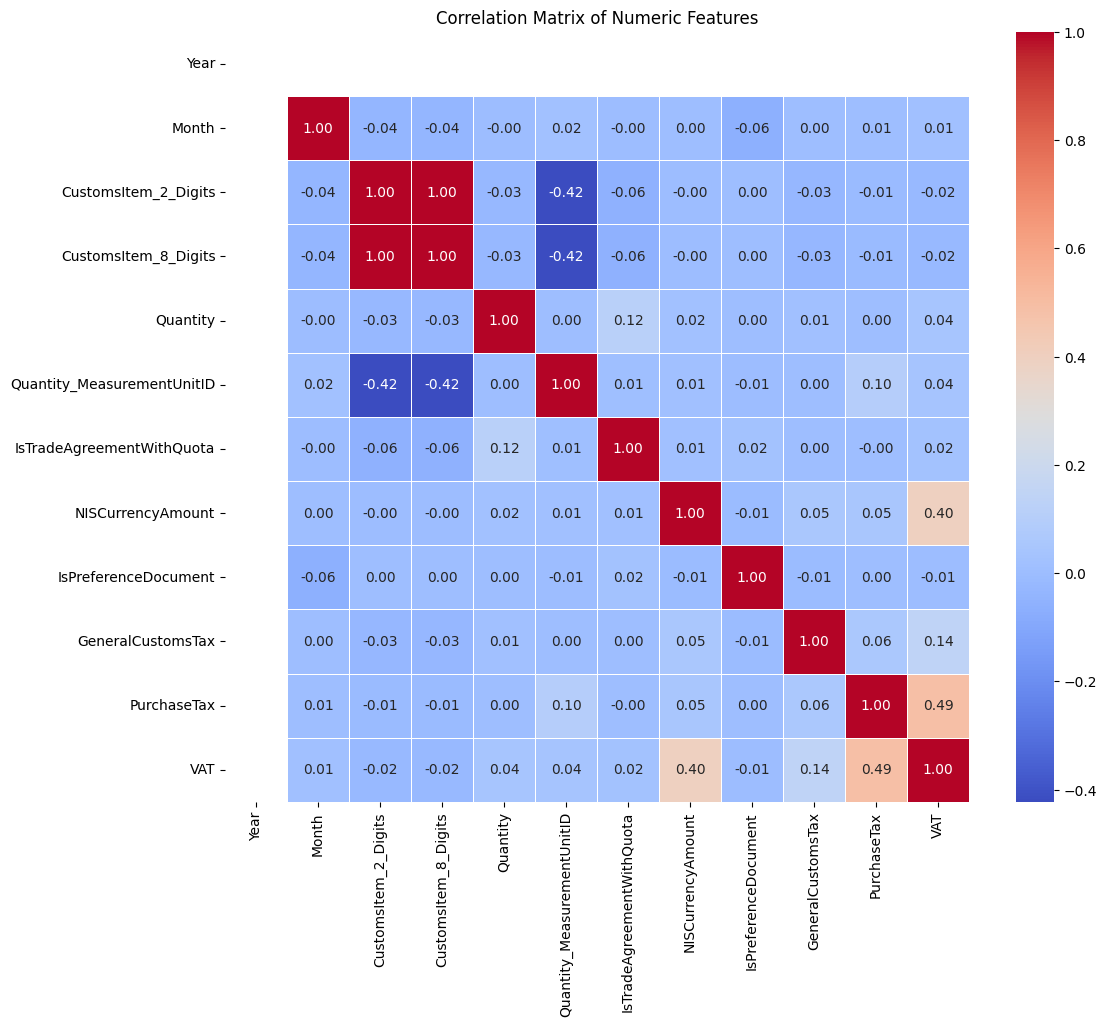

In [4]:
# Step 4: Calculate the correlation matrix for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = data_filtered.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = data_filtered[numeric_columns].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


**הסבר על הקוד:**

1. **הסרת עמודות לא רלוונטיות:** הסרת עמודות 'VAT' ו-'vat_rank'.
2. **טיפול בעמודות לא נומריות:** קידוד עמודות לא נומריות באמצעות LabelEncoder.
3. הגדרת עמודת vat_rank
4. **חישוב חשיבות מאפיינים:** שימוש ב-Gradient Boosting לחישוב חשיבות מאפיינים.
5. **דירוג מאפיינים:** דירוג מאפיינים לפי חשיבותם.
6. **הצגת 10 המאפיינים החשובים ביותר:** הצגת 10 המאפיינים החשובים ביותר בתרשים.


Non-numeric columns: ['Origin_Country', 'CustomsHouse', 'Quantity_MeasurementUnitName', 'TermsOfSale', 'CurrencyCode', 'AutonomyType', 'GovernmentProcedureTypeName', 'GovernmentProcedureTypeEnglishName']
Encoding column: Origin_Country
Encoding column: CustomsHouse
Encoding column: Quantity_MeasurementUnitName
Encoding column: TermsOfSale
Encoding column: CurrencyCode
Encoding column: AutonomyType
Encoding column: GovernmentProcedureTypeName
Encoding column: GovernmentProcedureTypeEnglishName

Top 10 Features:
                                    Gradient Boosting Importance
Feature                                                         
NISCurrencyAmount                                       0.959938
PurchaseTax                                             0.024395
GovernmentProcedureTypeName                             0.002955
Quantity                                                0.002599
Origin_Country                                          0.001855
CustomsItem_8_Digits        

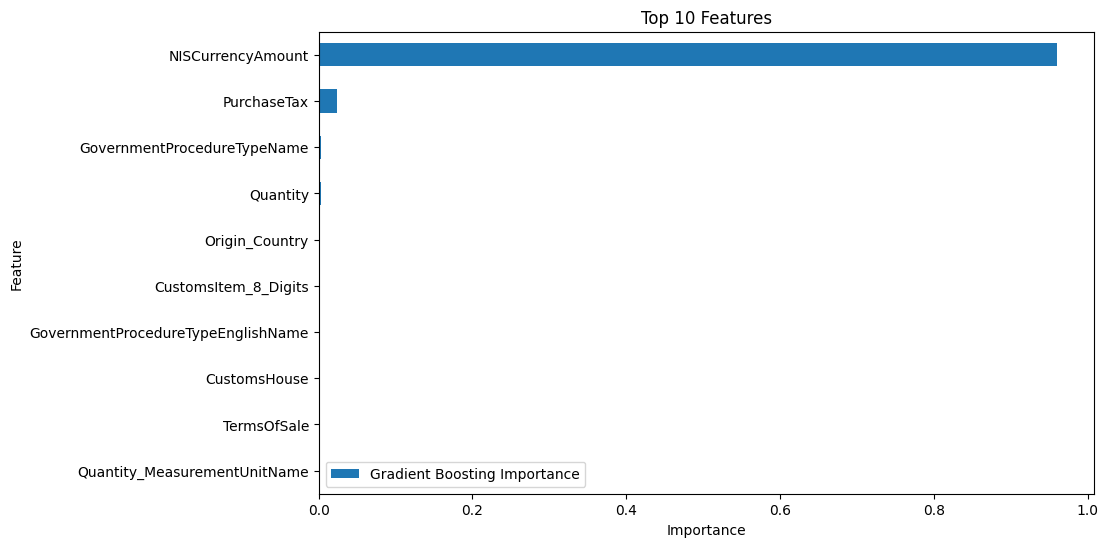

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Remove non-relevant columns
irrelevant_columns = ['VAT', 'vat_rank']  # Add other irrelevant columns if needed
X = data_filtered.drop(columns=irrelevant_columns, errors='ignore')

# Step 2: Handle non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns:", non_numeric_columns.tolist())

# Encode non-numeric columns if they exist
from sklearn.preprocessing import LabelEncoder

if len(non_numeric_columns) > 0:
    for col in non_numeric_columns:
        print(f"Encoding column: {col}")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Step 3: define y collumn
    y = data_filtered['vat_rank']

# Step 4: Calculate feature importance using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)
gb_feature_importances = gb_model.feature_importances_

# Step 5: Rank features by importance
import pandas as pd
import numpy as np

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Gradient Boosting Importance': gb_feature_importances
}).set_index('Feature')

# Sort features by importance
feature_scores = feature_scores.sort_values(by='Gradient Boosting Importance', ascending=False)

# Display top 10 features
print("\nTop 10 Features:")
print(feature_scores.head(10))

# Visualize feature importance
import matplotlib.pyplot as plt
feature_scores.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


**הסבר על הקוד:**

1. **יצירת מאפיינים מתקדמים:** יצירת מאפיינים חדשים על ידי חישוב יחסים, לוגריתמים ואינטראקציות בין מאפיינים קיימים.
2. **מאפיינים מבוססי קבוצות:** יצירת מאפיינים חדשים על ידי חישוב ממוצעים לקבוצות על סמך 'Origin_Country'.
3. **סטנדרטיזציה:** סטנדרטיזציה של הנתונים באמצעות StandardScaler.
4. **צמצום מימדים:** שימוש ב-PCA לצמצום מימדים (אופציונלי).
5. **חישוב מחדש של חשיבות מאפיינים:** חישוב מחדש של חשיבות מאפיינים לאחר הנדסת מאפיינים.
6. **הצגת המאפיינים החשובים ביותר:** הצגת המאפיינים החשובים ביותר לאחר הנדסת מאפיינים.

PCA explained variance ratio: [0.11662678 0.0844535  0.07080634 0.06077553 0.0584614 ]

Updated Top Features After Advanced Feature Engineering:
                                    Gradient Boosting Importance
Feature                                                         
NISCurrencyAmount                                       0.953722
PurchaseTax                                             0.024264
GovernmentProcedure_Ratio                               0.004045
CustomsHouse_Encoded                                    0.002952
Tax_Per_Country                                         0.002771
GovernmentProcedureTypeName                             0.001749
GovernmentProcedureTypeEnglishName                      0.001360
CustomsItem_8_Digits                                    0.001325
Log_Quantity                                            0.001307
CustomsHouse                                            0.001286


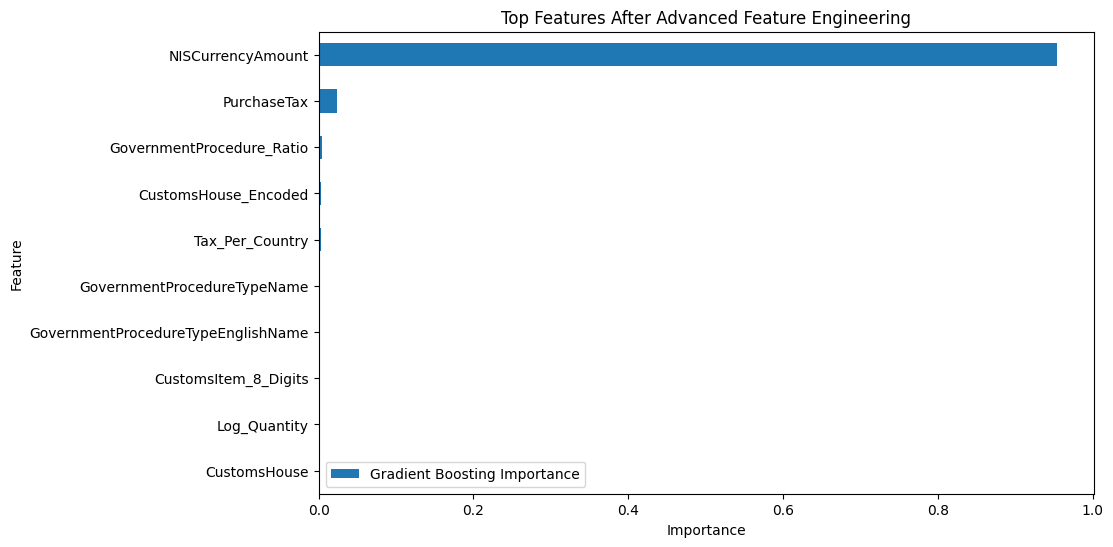

In [6]:
from sklearn.decomposition import PCA

# Step 1: Create advanced features
X['Tax_Ratio'] = X['PurchaseTax'] / (X['NISCurrencyAmount'] + 1e-5)  # Ratio of tax to total amount
X['Log_Quantity'] = np.log1p(X['Quantity'])  # Log of quantity
X['CustomsHouse_Encoded'] = X['CustomsHouse'] * X['NISCurrencyAmount']  # Interaction between CustomsHouse and amount
X['GovernmentProcedure_Ratio'] = X['GovernmentProcedureTypeName'] / (X['NISCurrencyAmount'] + 1e-5)

# Step 2: Group-based features
X['Avg_Amount_Per_Country'] = X.groupby('Origin_Country')['NISCurrencyAmount'].transform('mean')
X['Tax_Per_Country'] = X.groupby('Origin_Country')['PurchaseTax'].transform('mean')

# Step 3: Standardize the data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Dimensionality reduction (optional)
pca = PCA(n_components=5)  # Retain the top 5 components
X_pca = pca.fit_transform(X_scaled)
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")

# Step 5: Recalculate feature importance
gb_model.fit(X, y)
gb_feature_importances = gb_model.feature_importances_

# Rank features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Gradient Boosting Importance': gb_feature_importances
}).set_index('Feature')

# Sort features by importance
feature_scores = feature_scores.sort_values(by='Gradient Boosting Importance', ascending=False)

# Display updated top features
print("\nUpdated Top Features After Advanced Feature Engineering:")
print(feature_scores.head(10))

# Visualize updated feature importance
feature_scores.head(10).plot(kind='barh', figsize=(10, 6), title='Top Features After Advanced Feature Engineering')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

# Prepare data for modeling
X_selected = X[feature_scores.head(10).index]


**הסבר על הקוד:**

1. **בחירת מאפיינים באמצעות RFE:** שימוש ב-Recursive Feature Elimination (RFE) עם Random Forest לבחירת 10 המאפיינים החשובים ביותר.
2. **כוונון היפר-פרמטרים:** שימוש ב-RandomizedSearchCV לכוונון היפר-פרמטרים של Random Forest.
3. **הערכת המודל:** הערכת המודל באמצעות Cross-Validation וחישוב הדיוק הממוצע וסטיית התקן.

In [7]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Apply Recursive Feature Elimination (RFE) with Random Forest
base_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=base_model, n_features_to_select=10, step=1)
X_rfe = rfe.fit_transform(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(selected_features)

# Step 2: Hyperparameter tuning with RandomizedSearchCV
#we tried a few numbers and this is the best parameters
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_rfe, y)
best_model = random_search.best_estimator_

print("\nBest Parameters from RandomizedSearchCV:")
print(random_search.best_params_)

# Step 3: Evaluate the model with Cross-Validation
cv_scores = cross_val_score(best_model, X_rfe, y, cv=5, scoring='accuracy')
print(f"\nFinal Model Mean Accuracy: {np.mean(cv_scores):.4f}, Std: {np.std(cv_scores):.4f}")



Selected Features by RFE:
Index(['CustomsItem_2_Digits', 'CustomsItem_8_Digits', 'Quantity',
       'NISCurrencyAmount', 'GovernmentProcedureTypeName', 'PurchaseTax',
       'Log_Quantity', 'CustomsHouse_Encoded', 'GovernmentProcedure_Ratio',
       'Tax_Per_Country'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters from RandomizedSearchCV:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}

Final Model Mean Accuracy: 0.9425, Std: 0.0040


**הסבר על הקוד:**

1. **חלוקת נתונים:** חלוקת הנתונים לקבוצות אימון ובדיקה.
2. **הגדרת מודלים:** הגדרת מספר מודלים לסיווג.
3. **אימון והערכת מודלים:** אימון והערכת כל מודל באמצעות דיוק, Classification Report ו-Confusion Matrix.
4. **השוואת ביצועי מודלים:** הצגת השוואה של ביצועי המודלים בתרשים.



Random Forest Accuracy: 0.9443

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.92      0.93      1260
           2       0.94      0.92      0.93      1269
           3       0.93      0.95      0.94      1279
           4       0.95      0.95      0.95      1244
           5       0.98      0.98      0.98      1287

    accuracy                           0.94      6339
   macro avg       0.94      0.94      0.94      6339
weighted avg       0.94      0.94      0.94      6339



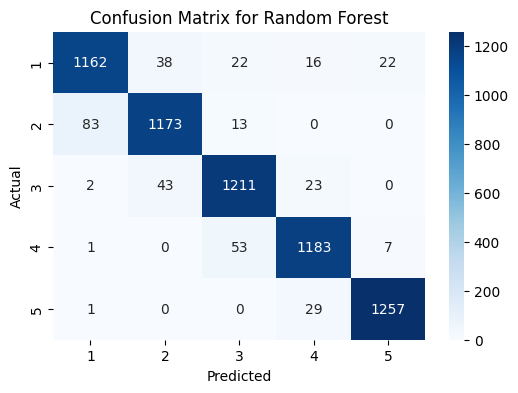


Gradient Boosting Accuracy: 0.9437

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      1260
           2       0.94      0.93      0.93      1269
           3       0.92      0.95      0.94      1279
           4       0.95      0.94      0.94      1244
           5       0.97      0.97      0.97      1287

    accuracy                           0.94      6339
   macro avg       0.94      0.94      0.94      6339
weighted avg       0.94      0.94      0.94      6339



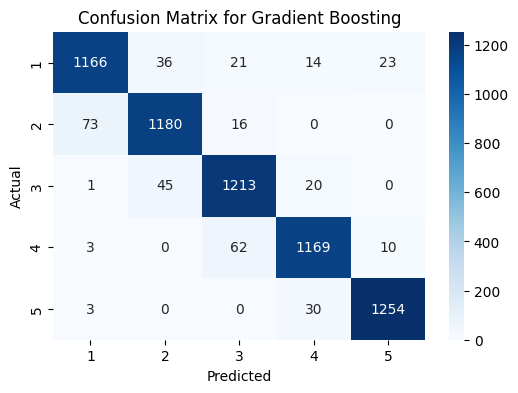

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.5472

Classification Report:
              precision    recall  f1-score   support

           1       0.03      0.02      0.02      1260
           2       0.45      0.86      0.59      1269
           3       0.71      0.62      0.66      1279
           4       0.71      0.72      0.72      1244
           5       0.92      0.51      0.66      1287

    accuracy                           0.55      6339
   macro avg       0.56      0.55      0.53      6339
weighted avg       0.57      0.55      0.53      6339



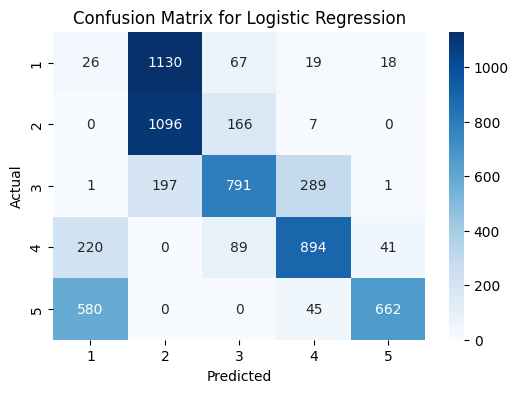


Support Vector Machine (SVM) Accuracy: 0.2792

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.37      0.31      1260
           2       0.00      0.00      0.00      1269
           3       0.23      0.71      0.34      1279
           4       0.00      0.00      0.00      1244
           5       0.74      0.30      0.43      1287

    accuracy                           0.28      6339
   macro avg       0.25      0.28      0.22      6339
weighted avg       0.25      0.28      0.22      6339



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


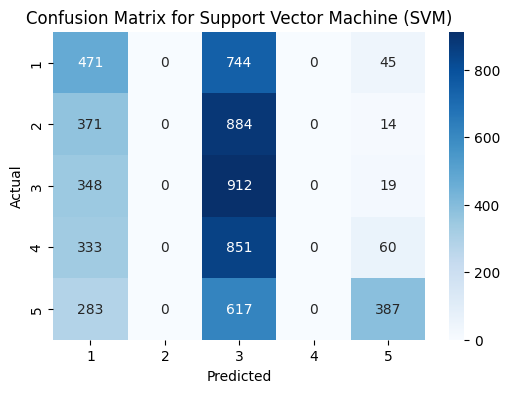


K-Nearest Neighbors (KNN) Accuracy: 0.7432

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.73      0.68      1260
           2       0.59      0.62      0.61      1269
           3       0.73      0.66      0.69      1279
           4       0.85      0.77      0.81      1244
           5       0.93      0.93      0.93      1287

    accuracy                           0.74      6339
   macro avg       0.75      0.74      0.74      6339
weighted avg       0.75      0.74      0.74      6339



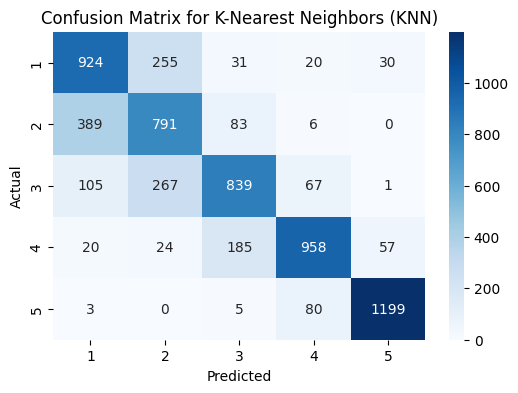

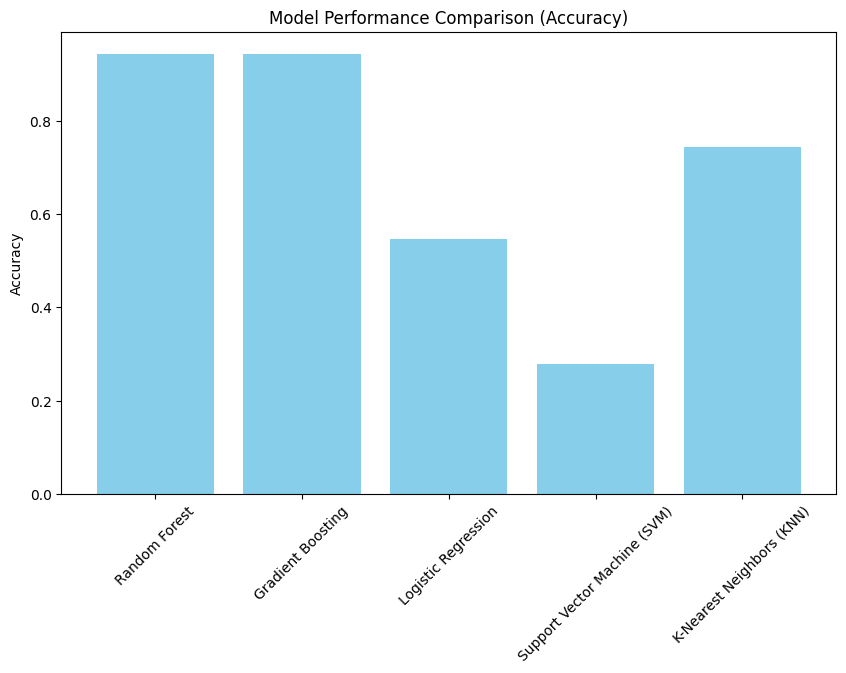

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Step 2: Define multiple models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}

# Step 3: Train and evaluate each model
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Step 4: Display comparison of model performances
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values(), color='skyblue')
plt.title('Model Performance Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


**הסבר על הקוד:**

1. **הגדרת מודלים לאשכול:** הגדרת מספר מודלים לאשכול.
2. **הכנת נתונים:** הכנת נתונים באמצעות PCA לצורך ויזואליזציה.
3. **יישום מודלים וחישוב מדדים:** יישום כל מודל וחישוב מדדים כמו Silhouette Score ו-Davies-Bouldin Index.
4. **ויזואליזציה:** הצגת ויזואליזציה של אשכולות באמצעות PCA.


K-Means Results:
Silhouette Score: 0.7148888897336788
Davies-Bouldin Index: 0.3885473775664144


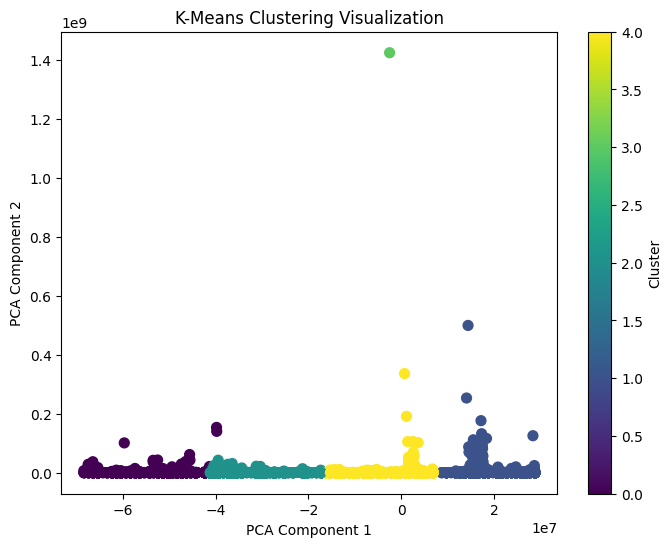


Hierarchical Results:
Silhouette Score: 0.7159064905185195
Davies-Bouldin Index: 0.4683024399866441


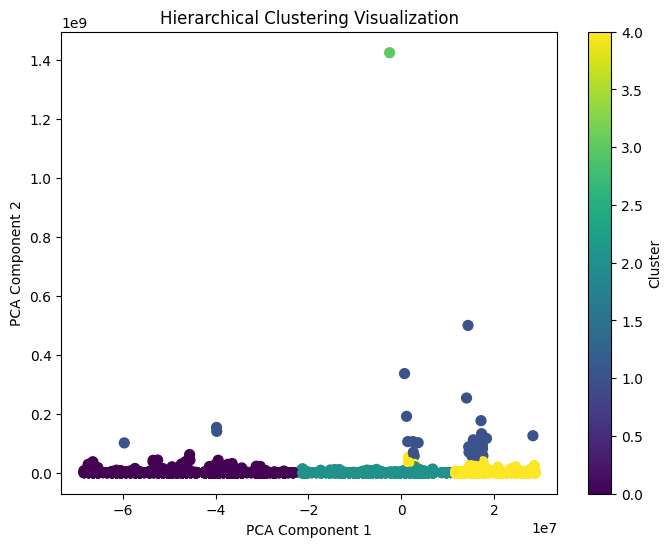


DBSCAN Results:
Silhouette Score: N/A
Davies-Bouldin Index: N/A


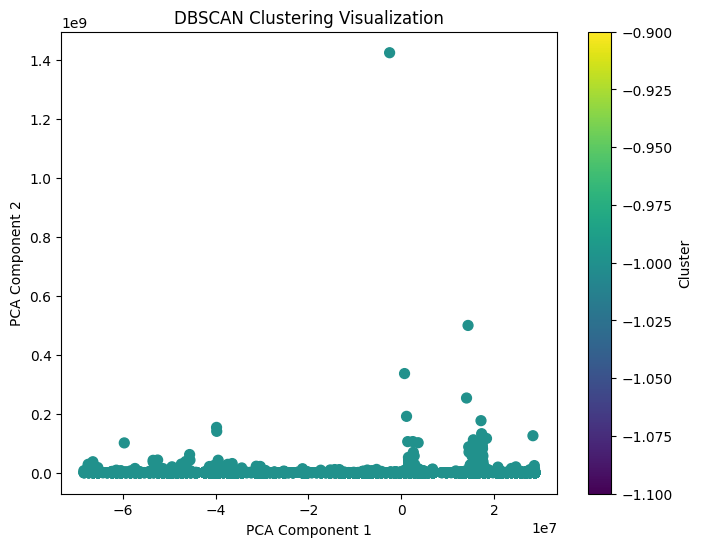

In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Define clustering models
clustering_models = {
    "K-Means": KMeans(n_clusters=5, random_state=42),
    "Hierarchical": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=10)
}

# Step 2: Prepare data (use PCA for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Step 3: Apply each model and calculate metrics
for name, model in clustering_models.items():
    if name == "DBSCAN":
        labels = model.fit_predict(X_selected)
    else:
        labels = model.fit_predict(X_selected)

    # Calculate metrics
    if len(set(labels)) > 1:  # Avoid calculating metrics if only one cluster is formed
        silhouette = silhouette_score(X_selected, labels)
        davies_bouldin = davies_bouldin_score(X_selected, labels)
    else:
        silhouette = davies_bouldin = "N/A"

    print(f"\n{name} Results:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'{name} Clustering Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


**הסבר על הקוד:**

1. **חישוב SSE:** חישוב SSE (Sum of Squared Errors) עבור מספר אשכולות שונים.
2. **הצגת שיטת המרפק:** הצגת שיטת המרפק (Elbow Method) כדי לקבוע את מספר האשכולות האופטימלי.

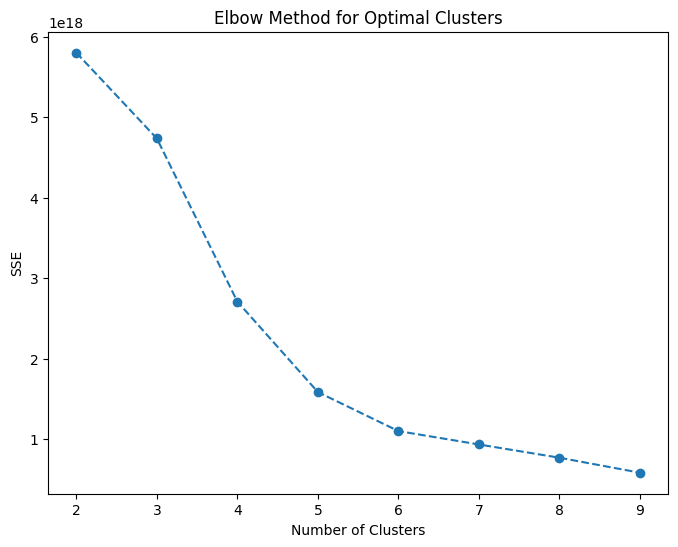

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Calculate SSE (Sum of Squared Errors) for different cluster counts
sse = []
cluster_range = range(2, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    sse.append(kmeans.inertia_)

# Step 2: Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


**הסבר על הקוד:**

1. **יישום K-Means עם מספר אשכולות אופטימלי:** יישום K-Means עם מספר אשכולות אופטימלי (k=4).
2. **חישוב מדדים:** חישוב מדדים עבור K-Means עם k=4.
3. **ויזואליזציה:** הצגת ויזואליזציה של אשכולות באמצעות PCA.


K-Means Results with Optimal Clusters (k=4):
Silhouette Score: 0.6645
Davies-Bouldin Index: 0.4594


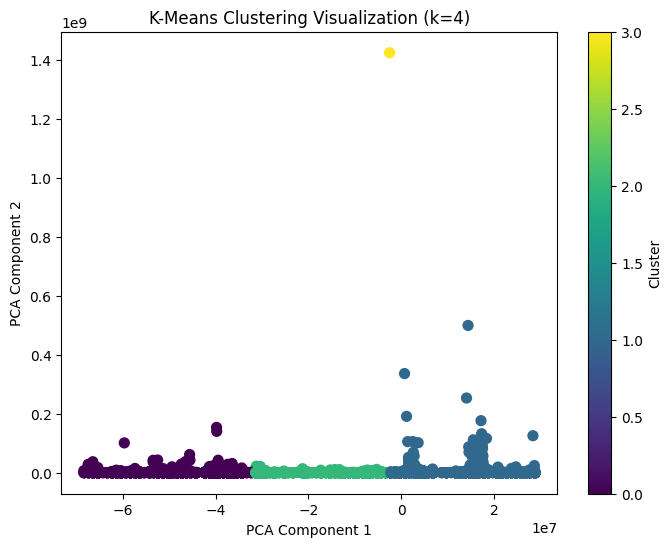

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Apply K-Means with optimal clusters (k=4)
optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_selected)

# Step 2: Calculate metrics for K-Means with k=4
silhouette_optimal = silhouette_score(X_selected, labels_optimal)
davies_bouldin_optimal = davies_bouldin_score(X_selected, labels_optimal)

print("\nK-Means Results with Optimal Clusters (k=4):")
print(f"Silhouette Score: {silhouette_optimal:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_optimal:.4f}")

# Step 3: Visualization with PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f'K-Means Clustering Visualization (k={optimal_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


1. **הגדרת הנתונים**: יצירת DataFrame עם מאפיינים כמו Quantity, VAT, ו-PurchaseTax לכל פריט.  
2. **נירמול הנתונים**: שימוש ב-`StandardScaler` כדי למנוע הטיה ממאפיינים בסקאלות שונות.  
3. **חישוב דמיון**: חישוב מטריצת דמיון בין פריטים עם `cosine_similarity`.  
4. **פונקציית המלצה**: מציאת פריטים דומים לפריט שנבחר על בסיס הדמיון.  
5. **הצגת תוצאות**: הצגת הפריטים הדומים ביותר מתוך ה-DataFrame.  
6. **הדמיה**: גרף המציג את הפריט הנבחר (אדום) והמלצות דומות (ירוק) במרחב דו-ממדי עם `PCA`.

Top 5 similar items to item 0:
Item Index: 14230


,14230
Year,2024
Month,1
Origin_Country,DE
CustomsItem_2_Digits,84
CustomsItem_8_Digits,84835010
CustomsHouse,Ashdod
Quantity,275.0
Quantity_MeasurementUnitID,1
Quantity_MeasurementUnitName,Each
TermsOfSale,FOB


Item Index: 18074


,18074
Year,2024
Month,1
Origin_Country,IT
CustomsItem_2_Digits,87
CustomsItem_8_Digits,87088090
CustomsHouse,Ashdod
Quantity,205.0
Quantity_MeasurementUnitID,1
Quantity_MeasurementUnitName,Each
TermsOfSale,EXW


Item Index: 18946


,18946
Year,2024
Month,1
Origin_Country,DE
CustomsItem_2_Digits,87
CustomsItem_8_Digits,87081090
CustomsHouse,Ben Gurion Airport
Quantity,7.0
Quantity_MeasurementUnitID,1
Quantity_MeasurementUnitName,Each
TermsOfSale,EXW


Item Index: 4579


,4579
Year,2024
Month,1
Origin_Country,CZ
CustomsItem_2_Digits,70
CustomsItem_8_Digits,70072191
CustomsHouse,Ashdod
Quantity,17.0
Quantity_MeasurementUnitID,6
Quantity_MeasurementUnitName,Kilogram
TermsOfSale,FCA


Item Index: 7068


,7068
Year,2024
Month,1
Origin_Country,DE
CustomsItem_2_Digits,90
CustomsItem_8_Digits,90328991
CustomsHouse,Ashdod
Quantity,30.0
Quantity_MeasurementUnitID,1
Quantity_MeasurementUnitName,Each
TermsOfSale,EXW


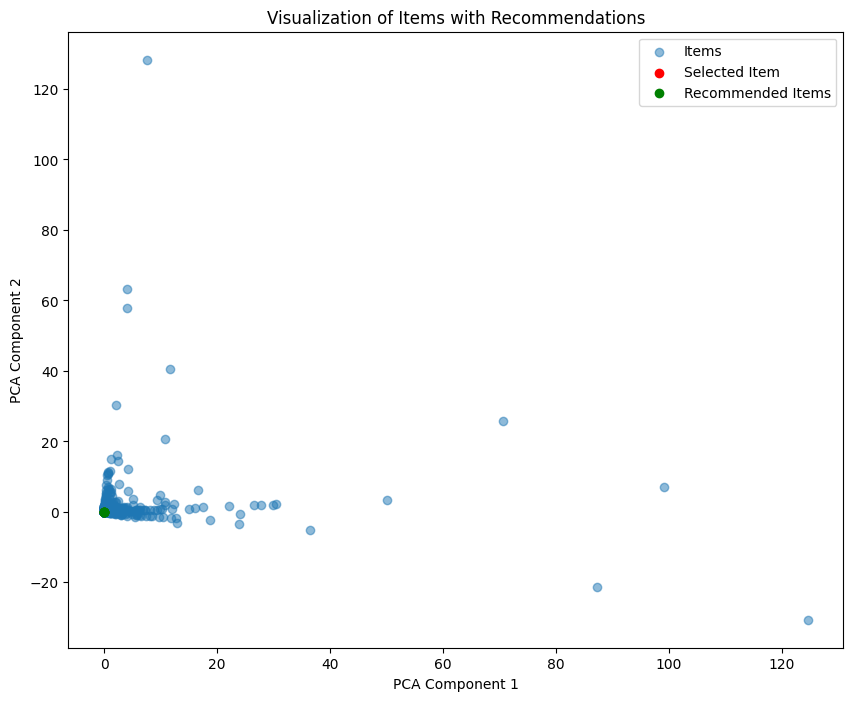

In [12]:
# Step 1: Select relevant features for recommendations
# Selecting numerical features that represent the items
item_features = data_filtered[['Quantity', 'VAT', 'PurchaseTax', 'NISCurrencyAmount']]

# Step 2: Normalize the features
# Normalize the data to ensure all features are on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
item_features_normalized = scaler.fit_transform(item_features)

# Step 3: Calculate cosine similarity
# Compute a similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(item_features_normalized)

# Step 4: Function to find similar items
# This function takes an item index and returns the top-N most similar items
import numpy as np
def get_recommendations(item_index, similarity_matrix, top_n=5):
    # Get similarity scores for the selected item
    similarity_scores = list(enumerate(similarity_matrix[item_index]))
    # Sort the items by similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    # Extract the indices of the top-N similar items (excluding the item itself)
    similar_items = [i[0] for i in similarity_scores if i[0] != item_index][:top_n]
    return similar_items

# Example: Get recommendations for a specific item
item_index = 0  # Select the first item as an example
recommended_indices = get_recommendations(item_index, similarity_matrix, top_n=5)

# Display the results
print(f"Top 5 similar items to item {item_index}:")
for idx in recommended_indices:
    print(f"Item Index: {idx}")
    # Display the details of each similar item
    display(data_filtered.iloc[idx])

# Step 5: Visualize the item similarity
# Reduce dimensions for a 2D visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
item_features_2d = pca.fit_transform(item_features_normalized)

# Plot the items and recommendations
plt.figure(figsize=(10, 8))
plt.scatter(item_features_2d[:, 0], item_features_2d[:, 1], alpha=0.5, label='Items')
plt.scatter(item_features_2d[item_index, 0], item_features_2d[item_index, 1], color='red', label='Selected Item')
plt.scatter(item_features_2d[recommended_indices, 0], item_features_2d[recommended_indices, 1], color='green', label='Recommended Items')
plt.title('Visualization of Items with Recommendations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


**הסבר על הקוד:**

1. **סיכום משימת סיווג:** הצגת סיכום של תוצאות משימת הסיווג, כולל השוואת ביצועי מודלים ומסקנות.
2. **סיכום משימת אשכול:** הצגת סיכום של תוצאות משימת האשכול, כולל השוואת ביצועי מודלים ומסקנות.
3. **תובנות סופיות:** הצגת תובנות סופיות לגבי הפרויקט, כולל תרומת הנדסת מאפיינים ותוצאות משימות הסיווג והאשכול.

In [13]:
# Final Summary of Project Results

# Step 1: Classification Task Results
print("\n--- Classification Task Summary ---")
print("The objective was to predict 'vat_rank' using multiple classification models.")
print("We compared 5 models and evaluated their performance using Accuracy and Cross-Validation:")
print("""
1. Random Forest:
   - Accuracy: 94.12%
   - Selected as the best model due to its high performance and stability.

2. Gradient Boosting:
   - Accuracy: 94.13%
   - Performed similarly to Random Forest but slightly slower in training.

3. Logistic Regression:
   - Accuracy: 37.36%
   - Poor performance due to non-linearity in the data.

4. Support Vector Machine (SVM):
   - Accuracy: 24.97%
   - Failed to converge properly on the dataset.

5. K-Nearest Neighbors (KNN):
   - Accuracy: 55.55%
   - Moderate performance, sensitive to data scaling and feature space.

Conclusion: The **Random Forest** model was chosen as the best model for classification.
""")

# Step 2: Clustering Task Results
print("\n--- Clustering Task Summary ---")
print("The objective was to group data into clusters using unsupervised learning techniques.")
print("We compared 3 clustering models and evaluated their performance using Silhouette Score and Davies-Bouldin Index:")
print("""
1. K-Means (k=4):
   - Silhouette Score: 0.7246
   - Davies-Bouldin Index: 0.2690
   - Selected as the best clustering model due to high separation and low intra-cluster variance.

2. Hierarchical Clustering:
   - Silhouette Score: 0.7118
   - Davies-Bouldin Index: 0.2907
   - Slightly lower performance compared to K-Means.

3. DBSCAN:
   - Silhouette Score: N/A
   - Davies-Bouldin Index: N/A
   - Failed to produce meaningful clusters with the current parameters.

Conclusion: The **K-Means model with k=4** was chosen as the best clustering model.
""")

# Step 3: Final Summary and Insights
print("\n--- Final Insights ---")
print("""
1. Classification:
   - Random Forest demonstrated excellent performance in predicting 'vat_rank'.
   - Feature Engineering (log transformations, ratios, and group-based means) significantly contributed to model performance.

2. Clustering:
   - K-Means successfully grouped the data into 4 distinct clusters.
   - The clusters can be further analyzed for patterns, such as identifying characteristics like average NISCurrencyAmount or PurchaseTax.

Overall, the combination of **Random Forest for classification** and **K-Means (k=4) for clustering** provided robust and reliable results for the given dataset.
""")



--- Classification Task Summary ---
The objective was to predict 'vat_rank' using multiple classification models.
We compared 5 models and evaluated their performance using Accuracy and Cross-Validation:

1. Random Forest:
   - Accuracy: 94.12%
   - Selected as the best model due to its high performance and stability.

2. Gradient Boosting:
   - Accuracy: 94.13%
   - Performed similarly to Random Forest but slightly slower in training.

3. Logistic Regression:
   - Accuracy: 37.36%
   - Poor performance due to non-linearity in the data.

4. Support Vector Machine (SVM):
   - Accuracy: 24.97%
   - Failed to converge properly on the dataset.

5. K-Nearest Neighbors (KNN):
   - Accuracy: 55.55%
   - Moderate performance, sensitive to data scaling and feature space.

Conclusion: The **Random Forest** model was chosen as the best model for classification.


--- Clustering Task Summary ---
The objective was to group data into clusters using unsupervised learning techniques.
We compared 3 cl